# Implementation of Naive Bayes Rule


## Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split,cross_val_score

## Fetch database and prepare it

In [3]:
df_X,df_y = fetch_openml("titanic",version=1, return_X_y=True, parser='auto')
df_X['embarked'] = pd.factorize(df_X['embarked'])[0]
df_X['sex'] = pd.factorize(df_X['sex'])[0]
df_X = df_X.drop(['name','body','ticket','cabin','home.dest','boat'],axis=1)
embarkedMode = df_X['embarked'].mode()
df_X['embarked'] = df_X['embarked'].fillna(embarkedMode)
df_X['fare'] = df_X['fare'].fillna(df_X['fare'].mean())
df_X['age'] = df_X['age'].fillna(df_X['age'].mean())

## Split trainig and testing data

In [4]:
X_train,X_test,y_train,y_test = train_test_split(df_X,df_y,test_size=0.3)

## Import and set model up

In [8]:
NB = GaussianNB()

In [9]:
NB.fit(X_train,y_train)

GaussianNB()

## Test the prediction

In [10]:
y_predict = NB.predict(X_test)

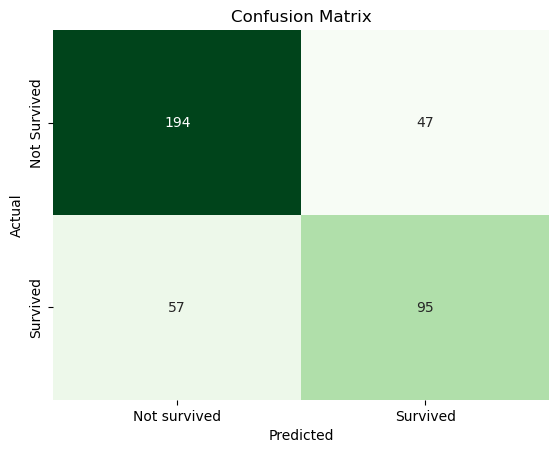

In [13]:
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test,y_predict)
cm_dt

import seaborn as sns
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Not survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()